Рассматривается следующая задача:

$\\ 25\lambda\frac{\partial^{2}\phi}{\partial x^{2}} + \lambda\frac{\partial^{2}\phi}{\partial y^{2}} = \frac{\partial\phi}{\partial \tau} \qquad x,y,t \in [0,1] $

$ \phi(x,y,0) = cos(\pi x)sin(5\pi y) \\ \phi(x,0,t) = \phi(x,1,t) = 0, \qquad x,t \in [0,1] \\ \phi(0,y,t) = sin(5\pi y)exp(-5\pi^{2}t),\quad \phi(1,y,t) = -sin(5\pi y)exp(-5\pi^{2}t),\qquad y,t \in [0,1]$

 решаем ее численными методами.

После дискретизаций уравнения:

$ 25\lambda\frac{\partial^{2}\phi}{\partial x^{2}} \approx 25\lambda\frac{u_{i+1,j}^{n+1} - 2u_{i,j}^{n+1} + u_{i-1,j}^{n+1}}{h_{x}^2} \qquad
 \lambda\frac{\partial^{2}\phi}{\partial y^{2}} \approx \lambda\frac{u_{i,j+1}^{n+1} - 2u_{i,j}^{n+1} + u_{i,j-1}^{n+1}}{h_{y}^2} \qquad  \frac{\partial\phi}{\partial \tau} \approx \frac{u_{i,j}^{n+1} - u_{i,j}^{n}}{\tau}$

Откуда получаем:
$ cu_{i-1,j}^{n+1} + gu_{i,j-1}^{n+1} + au_{i,j}^{n+1} + bu_{i+1,j}^{n+1} + fu_{i,j+1}^{n+1} = d_{i,j} $

где:

$ a = -\frac{50\lambda}{h_{x}^2} -  \frac{2\lambda}{h_{y}^2} -  \frac{1}{\tau}$ $\qquad$ $ b = \frac{25\lambda}{h_{x}^2}$

$ c = \frac{25\lambda}{h_{x}^2}$ $\quad$ $ g = -\frac{\lambda}{h_{x}^2}$ $\quad$ $ f = -\frac{\lambda}{h_{x}^2} \quad d_{i,j}^{n} = -\frac{u_{i,j}^{n}}{\tau}$

В итоге:
$ cu_{i-1,j}^{n+1}  + au_{i,j}^{n+1} + bu_{i+1,j}^{n+1}  = d_{i,j} - gu_{i,j-1}^{n+1} - fu_{i,j+1}^{n} $

решаем ee прогонкой

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
λ = 1e-4
π = math.pi

Начальные условия:

In [ ]:
def φt0(x,y):
    return np.sin(5*π*y) * np.cos(π*x)

Граничное условие:

In [ ]:
def φx0(x,t):
    return 0.0
def φx1(x,t):
    return 0.0
def φy0(y,t):
    return (np.sin(5*π*y) * np.exp(-5*π*π*λ*t))
def φy1(y,t):
    return (-np.sin(5*π*y) * np.exp(-5*π*π*λ*t))

Аналитическое решение уравнения:

In [ ]:
def analytical(x,y,t):
    return np.sin(5*π*y) * np.cos(π*x) * np.exp(-5*π*π*λ*t)

In [ ]:
NX = int(input("ENTER NX:"))
NY = NX
## Генерация сетки
hx = 1/(NX-1)
hy = 1/(NY-1)
X = np.linspace(0.0,1.0,NX)
Y = np.linspace(0.0,1.0,NY)
num = NX * NY
## Задание нач.данных
τ = 1e-3
T = 1
t = 0 
## Нумерация по строкам
φ = np.zeros(num)
φanalytical = np.zeros(num)
for i in range(num):
    φ[i] = round(φt0(hx * (i % NX), hy * int(i / NX)),4)
    φanalytical[i] = round(analytical(hx * (i % NX),hy * int(i / NX),0.5),4)
φ1 = np.zeros(num)

In [ ]:
Q , K = np.zeros(NX-1), np.zeros(NX-1)
## рассчитываем коэфиценты матрицы
a = -(50*λ/hx**2) - (2*λ/hy**2) - (1/τ)
b = 25*λ/hx**2
c = 25*λ/hx**2
d = np.zeros(NX-2)
t = 0
count = 0

In [ ]:
while t < T:
# Расчет решения на границах:
    for k in range(num):
        if(int(k/NX) == 0):
            φ1[k] = φx0(hx*(k % NX),t)
        elif(int(k/NX) == NY-1):
            φ1[k] = φx1(hx*(k % NX),t)
        elif(((k%NX) == 0) and (int(k/NX) != NY-1)) :
            φ1[k] = φy0(hy * int(i / NX),t)
        elif(((k%NX) == NX - 1) and (int(k/NX) != NY-1)) :
            φ1[k] = φy0(hy * int(i / NX),t)
        else:
            φ1[k] = 0
    for j in range(1,NY-1):
        for i in range(1,NX-1):
    # Вычисление правой части:
            k = j * NX + i
            d[i-1] = -(φ[k]/τ) + (λ * φ1[k - NX]/hx**2) + (λ * φ[k + NX]/hx**2)
    # Методом прогонки находится решение системы
## Прямой ход прогонки
        Q[1] = - b / a
        K[1] = d[0] / a
        for m in range(1,NX-2):
            Q[m + 1] = - b / (c * Q[m] + a)
            K[m + 1] = (d[m] - c * K[m]) / (c * Q[m] + a)
## Обратный ход прогонки
        k = (j * NX) + NX - 2   
        φ1[k] = (d[NX - 3] - c * K[NX - 3]) / (c * Q[NX - 3] + a)
        for l in range (NX-2,1,-1):
            k = (j * NX) + l
            φ1[k - 1] = Q[i] * φ1[k] + K[i]
# Инкрементирование по времени
    if(count == 500):
        error = max(φ1-φanalytical)
    φ = φ1
    φ1 = np.zeros(num)
    count += 1
    t += τ

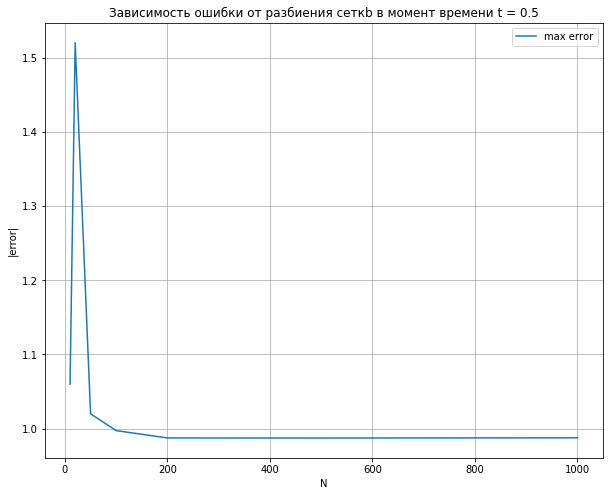

In [6]:
X = np.array([10,20,50,100,200,500,1000])
Error = np.array([1.06,1.52,1.02,0.9974,0.9875,0.9874,0.9877])

plt.figure(figsize=(10, 8))
plt.title("Зависимость ошибки от разбиения сеткb в момент времени t = 0.5")
plt.xlabel("N")
plt.ylabel("|error|")
plt.grid()
plt.plot(X, Error,label='max error')
plt.legend()